# Gaussowska Analiza Dyskryminacyjna

## Wprowadzenie
Gaussowska Analiza Dyskryminacyjna (GDA) to probabilistyczna metoda klasyfikacji, która opiera się na modelowaniu rozkładów cech warunkowanych przez klasę. GDA jest szczególnym przypadkiem liniowej analizy dyskryminacyjnej (LDA) i znajduje szerokie zastosowanie w zadaniach klasyfikacji, zwłaszcza gdy dane mają strukturę zgodną z założeniami rozkładu normalnego. 

W GDA dla każdej klasy estymujemy osobny rozkład Gaussa. Podczas przypisywania klasy do nowej próbki (proces inferencji) bierzemy pod uwagę dwa czynniki: 
- jak dobrze rozkład Gaussa danej klasy pasuje do tej próbki (wartość funkcji gęstości w jej punkcie),
- jak często ta klasa występuje w naszych danych (prawdopodobieństwo a priori klasy). 

GDA jest probabilistycznym modelem grafowym o następującej strukturze

![](assets/GDA_PGM.png "Schemat GDA jako PGM")

Z powyższej architektury możemy wywnioskować, że:
- Modelujemy dwie zmienne losowe: Y (etykiety klas) oraz X (wartości cech próbek)
- Informacja o etykiecie wpływa na wartości X - dla różnych klas posiadamy inny rozkład (w naszym przypadku Gaussa) o wektorze średnich $\mu_k$ i macierzy kowariancji $\Sigma_k$

Ilustrując konkretnie model GDA 

![](assets/gda_details.png "Dokładny schemat GDA")

Gdzie zmienna klasy $Y$ jest przez nas modelowana poprzez rozkład wielopunktowy (ang. categorical) o parametrach $\pi_k$, określających prawdopodobieństwo występienia klasy $k$-tej.
Rozkład warunkowy $p(x | y)$ modelujemy w postaci rozkładu Gaussa o parametrach średniej $\mu_k$ i macierzy kowariancji $\Sigma_k$. Warto zwrócić uwagę, że oba parametry mogą się róznić dla innych klas $Y$.

## Proces uczenia GDA
Model GDA składa się z parametrów:
- $\pi = (\pi_1, ..., \pi_k), $
- $\mu = (\mu_1, ..., \mu_k), $
- $\Sigma = (\Sigma_1, ..., \Sigma_k),$ 

które wyznaczamy na podstawie danych $\mathcal{D} = \{ (x_i, y_i) \}_{i=1}^N $ posiadający $N$ par danych z ich etykietami, wykorzystując metodę *Maximum Likelihood Estimation*.

Wartości $\pi_k$ estymujemy jako iloraz ilości wystąpień każdej z $K$ klas, oznaczony poprzez $N_k$, do ilości wszystkich próbek $N$
$$\pi_k = \frac{N_k}{N} \tag{1}$$

Następnie podzielmy zbiór danych zgodnie z wartościami etykiet $Y$, oznaczając próbkę $x_i^{(k)}$ jako obserwację dla której etykieta $y_i=k$. 
Średnią dla klasy $k$ wyznaczajmy jako
$$ \mu_k = \frac{1}{N_k} \sum_{i=1}^{N_k} x_i^{(k)}. \tag{2}$$

Z kolei macierz kowariancji estymujemy jako
$$ \Sigma_k = \frac{1}{N_k} \sum_{i=1}^{N_k} (x_i^{(k)} - \mu_k)(x_i^{(k)} - \mu_k)^T \tag{3}$$

## Proces inferencji GDA
Aby przypisać nową obserwację $x$ do jednej z $K$ klas, potrzebujemy odwrócić zależność $p(x | y)$ na $p(y | x)$. W tym celu wykorzystujemy regułę Bayesa:
$$ p(y = k | x) = \frac{p(x | y = k) p(y = k)}{p(x)} \tag{4}$$

Gdzie:
- $p(y = k)$ to aprioryczne prawdopodobieństwo klasy, które modelujemy na podstawie estymat $\pi$,
- $p(x | y = k)$ to rozkład warunkowy modelowany jako rozkład normalny,
- $p(x)$ to zmarginalizowany rozkład cech $x$ (dla wszystkich klas). 

Interesuje nas która klasa jest najbardziej prawdopodobna dla nowej obserwacji $x$
$$y^* = \arg\max_y p(y|x) \tag{5}$$

Podstawiając do wzoru (4) odpowiednie funkcje gęstości oraz masy prawdopodobieństwa, otrzymujemy:
$$
\begin{align*} 
    p(y = k | x) &= \frac{\mathcal{N}(\mu_k, \Sigma_k) \pi_k}{\sum_{i=1}^K \mathcal{N}(\mu_i, \Sigma_i) \pi_i} \\
    &= \frac{
        (2 \cdot 3.14)^{-\frac{d}{2}} det(\Sigma_k)^{-\frac{1}{2}} \exp(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)) \pi_k
    }{
        \sum_{i=1} ^K
        (2 \cdot 3.14)^{-\frac{d}{2}} det(\Sigma_i)^{-\frac{1}{2}} \exp(-\frac{1}{2} (x - \mu_i)^T \Sigma_i^{-1} (x - \mu_i)) \pi_i
    }, \tag{6}
\end{align*}
$$
gdzie $d$ to wymiarowość danych (ilość cech - w rozpatrywanych przez nas zbiorach będzie to $2$), natomiast $3.14$ oznacza wartość $pi$, która celowo została zapisana numerycznie, by nie myliła się z wartościami a priori prawdopodobieństw klas.

Warto zwrócić uwagę, że mianownik nie zależy od rozpatrywanej klasy $k$ i jest taki sam dla wszystkich klas, więc możemy go pominąć, gdyż zależy nam tylko na określeniu, która klasa jest najbardziej prawdopodobna i nie potrzebujemy znać dokładnej wartości

$$ p(y = k | x) \propto (2 \cdot 3.14)^{-\frac{d}{2}} det(\Sigma_k)^{-\frac{1}{2}} \exp(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)) \pi_k. \tag{7}$$

Dodatkowo, w celu zwiększenia stabilności obliczeń wyznaczmy logarytm z powyższego wyrażenia
$$ log p(y = k | x) \propto -\frac{d}{2} log(2 \cdot 3.14) - \frac{1}{2} log(det(\Sigma_k)) - \frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \pi_k. \tag{8} $$

Pierwszy człon nie zależy od klasy, więc można go pominąć, co ostatecznie daje nam 
$$ log p(y = k | x) \propto - \frac{1}{2} log(det(\Sigma_k)) - \frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \pi_k. \tag{9}$$

W celu wyznaczenia najbardziej prawdopodobnej klasy, musimy policzyć (9) dla wszystkich z $K$ klas i wybrać klasę, która zwraca największy wynik.

Wizualizując proces decyzyjny w przestrzeni jednowymiarowej na poniższym przykładzie, powiemy, że punkt po lewej stronie zostanie przypisany do klasy reprezentowanej przez "niebieskiego Gaussa", natomiast drugi punkt powinien posiadać klasę, modelowaną przez "czerwonego Gaussa".

![](assets/gaussy.png)

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.metrics import accuracy_score

In [82]:
def visualize_2d_dataset(X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.title(title)

def visualize_model(model, pi, mu, sigma, X_test, y_test, title, x_lims=(-3, 3), y_lims=(-3, 3), frequency=100, cmap='viridis'):
    xx, yy = np.meshgrid(
        np.linspace(x_lims[0], x_lims[1], frequency),
        np.linspace(y_lims[0], y_lims[1], frequency)
    )
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    predictions = model(pi, mu, sigma, grid_points).reshape(xx.shape)
    
    plt.contourf(xx, yy, predictions, alpha=0.3, cmap=cmap)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, edgecolors='k')
    plt.xlim(x_lims)
    plt.ylim(y_lims)
    plt.title(title)

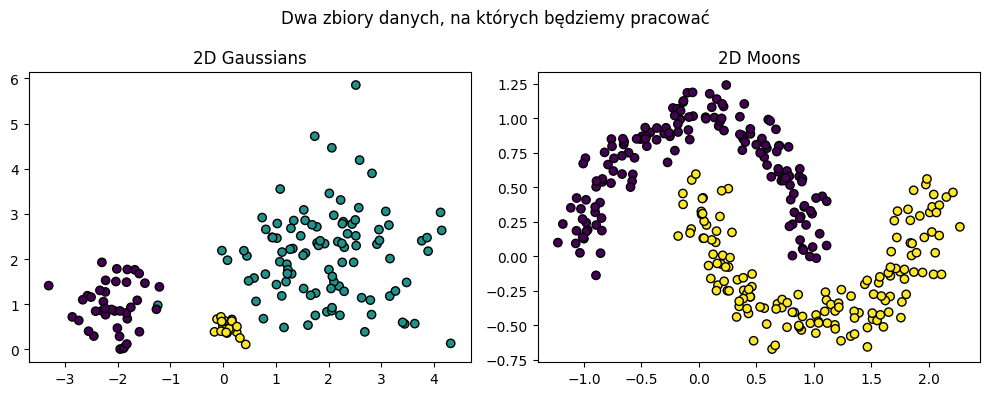

In [83]:
X_gauss, y_gauss = make_blobs(n_samples=[40, 100, 20], centers=[(-2, 1), (2, 2), (0, 0.5)], cluster_std=[0.5, 1, 0.2], random_state=42)
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
visualize_2d_dataset(X_gauss, y_gauss, "2D Gaussians")
plt.subplot(1, 2, 2)
visualize_2d_dataset(X_moons, y_moons, "2D Moons")
plt.suptitle("Dwa zbiory danych, na których będziemy pracować")
plt.tight_layout()
plt.show()

## Zadanie 1 (0.1 pkt)
Podziel oba zbiory na 2 podzbiory: treningowy oraz testowy, zachowując proporcje 70:30 i dokonując stratyfikacji.
Użyj poniższego nazewnictwa:
- `X_moons_train`, `X_moons_test`, `y_moons_train`, `y_moons_test`
- `X_gauss_train`, `X_gauss_test`, `y_gauss_train`, `y_gauss_test`

In [84]:
### POCZĄTEK ROZWIĄZANIA
from sklearn.model_selection import train_test_split
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, test_size=0.3, stratify=y_moons)
X_gauss_train, X_gauss_test, y_gauss_train, y_gauss_test = train_test_split(X_gauss, y_gauss, test_size=0.3, stratify=y_gauss)

### KONIEC ROZWIĄZANIA

In [85]:
assert len(X_moons_train) == 210, "złe proporcje podziału zbioru moons"
assert len(X_gauss_train) == 112, "złe proporcje podziału zbioru Gauss"

assert list(np.unique(y_moons_train, return_counts=True)[1]) == [105, 105], "brak stratyfikacji przy podziale zbioru moons"
assert list(np.unique(y_gauss_train, return_counts=True)[1]) == [28, 70, 14], "brak stratyfikacji przy podziale zbioru moons"

## Zadanie 2 (0.6 pkt)
Zaimplementuj funkcję `fit_gda`, w której dopasujesz parametry $(\pi, \mu, \Sigma)$ do danych `X` i ich etykiet `y`.

In [ ]:
def fit_gda(X, y):
    pi, mu, sigma = None, None, None
    ### POCZĄTEK ROZWIĄZANIA
    N = len(X)
    K = np.unique(y)
    pi = np.zeros(len(K))
    mu = np.zeros((len(K), X.shape[1]))
    sigma = np.zeros((len(K), X.shape[1], X.shape[1])) # 2 klasy, 2 cechy
    for k, i in enumerate(K):
        X_k = X[y == i]
        pi[k] = len(X_k) / N
        mu[k] = np.sum(X_k, axis=0) / len(X_k)
        sigma[k] = 1 / len(X_k) * np.sum([np.outer(x - mu[k], (x - mu[k]).T) for x in X_k], axis=0) #moze zostac .T dla formalnosci wzoru, ale nie musi bo numpy robi to za nas i zwraca outer product 2D
    ### KONIEC ROZWIĄZANIA

    return pi, mu, sigma

In [87]:
#X_moons_train.shape[1] #, robimy macierz kowariancji sigma 2x2x2, czyli dwie macierze 2x2

In [88]:
moons_gda = fit_gda(X_moons_train, y_moons_train)
gauss_gda = fit_gda(X_gauss_train, y_gauss_train)

assert len(moons_gda) == 3, "Zła ilość parametrów w modelu moons_gda"
assert len(gauss_gda) == 3, "Zła ilość parametrów w modelu gauss_gda"

assert len(moons_gda[0]) == len(np.unique(y_moons_train)), "Zła ilość modelowanych klas w modelu moons_gda"
assert len(gauss_gda[0]) == len(np.unique(y_gauss_train)), "Zła ilość modelowanych klas w modelu gauss_gda"

In [97]:
# moons_gda, gauss_gda

## Zadanie 3 (0.6 pkt)
Zaimplementuj funkcję `predict_gda`, w której dopasujesz etykiety `y_pred` dla danych `X` na podstawie parametrów modelu $(\pi, \mu, \Sigma)$. Skorzystaj ze wzoru (9). Na podstawie otrzymanych wyników z obu zbiorów napisz wnioski.

In [ ]:
def predict_gda(pi, mu, sigma, X):
    y_pred = None
    ### POCZĄTEK ROZWIĄZANIA
    K = len(pi)
    N = len(X)
    y_pred = np.zeros(N)
    for i in range(N):
        p = np.zeros(K)
        for k in range(K):
            p[k] = -0.5*np.log(np.linalg.det(sigma[k])) - 0.5*(X[i] - mu[k]).T @ np.linalg.inv(sigma[k]) @ (X[i] - mu[k]) + np.log(pi[k]) #  nie trzeba podnosic do exp bo log jest monotoniczny i ciagly (inaczej: nie zmienia nam max/min)
        y_pred[i] = np.argmax(p)
    ### KONIEC ROZWIĄZANIA

    return y_pred


In [91]:
y_gauss_pred = predict_gda(*gauss_gda, X_gauss_test)
y_moons_pred = predict_gda(*moons_gda, X_moons_test)

gauss_acc = accuracy_score(y_gauss_test, y_gauss_pred)
moons_acc = accuracy_score(y_moons_test, y_moons_pred)

assert gauss_acc > 0.8, "Zbyt niski wynik GDA na zbiorze Gauss - coś poszło nie tak."
assert moons_acc > 0.6, "Zbyt niski wynik GDA na zbiorze Moons - coś poszło nie tak."

print(f"Dokładność klasyfikacji na zbiorze Gauss: {gauss_acc:.2f}")
print(f"Dokładność klasyfikacji na zbiorze Moons: {moons_acc:.2f}")


Dokładność klasyfikacji na zbiorze Gauss: 0.98
Dokładność klasyfikacji na zbiorze Moons: 0.89


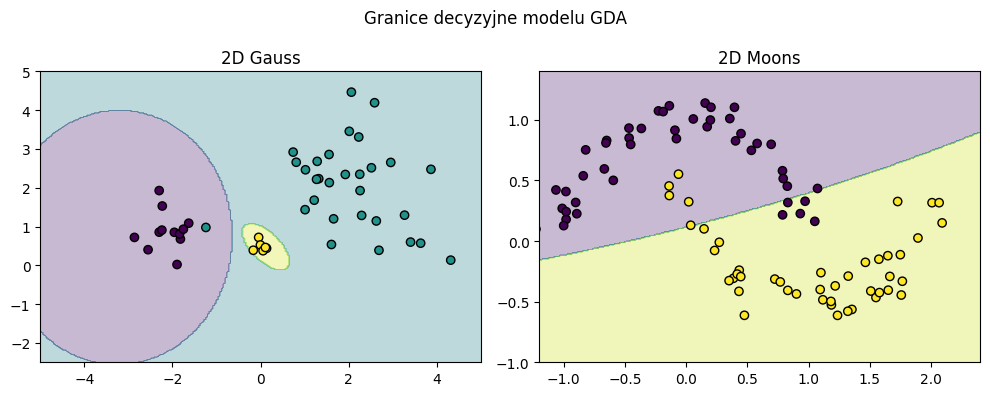

In [92]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
visualize_model(predict_gda, *gauss_gda, X_gauss_test, y_gauss_test, title="2D Gauss", x_lims=[-5, 5], y_lims=[-2.5, 5], frequency=250)
plt.subplot(1, 2, 2)
visualize_model(predict_gda, *moons_gda, X_moons_test, y_moons_test, title="2D Moons", x_lims=[-1.2, 2.4], y_lims=[-1, 1.4], frequency=250)
plt.suptitle("Granice decyzyjne modelu GDA")
plt.tight_layout()
plt.show()

Twoje Wnioski:
- W 2D Gauss dostaliśmy dobre granice decyzyjne, ponieważ zbiorem danym były Gaussy (zgodnie z naszym założeniem przy GDA, że rozkłady poszczególnych klas powinny przypominać Gaussy).
- Dla 2D Gauss, najczęstsza klasa zajmuje większość przestrzeni, pozostałe klasy mają większą wiarygodność tylko w obszarach, gdzie występują próbki z tych klas.
- W 2D Moons próbki w ramach klas nie pochodzą z rozkładu normalnego, dlatego model GDA nie radzi sobie idealnie z klasyfikacją.


Ale wnioski już są to chyba nie napiszę moich :/

## Model generatywny
Model GDA może zostać wykorzystany do wyznaczenia rozkładu klas a posteriori $p(y|x)$, co wykorzystaliśmy w celu klasyfikacji próbek (model dyskryminacyjny). Jednak zdolności tego modelu są znacznie szersze, ponieważ modelując rozkład łączny $p(x, y)$ jesteśmy w stanie tworzyć nowe dane na podstawie wytrenowanego modelu (model generatywny). Proces próbkowania bardzo dobrze wizualizuje pierwsza grafika na początku listy:
- najpierw próbkujemy etykiety y (na podstawie parametrów częstotliwości występowania $\pi$) - próbkowanie z rozkładu $p(y)$,
- następnie na podstawie etykiet korzystamy z gaussa opisującego odpowiednią klasę $y$ (na podstawie parametrów odpowiedniego Gaussa $(\mu_y, \Sigma_y)$) - próbkowanie z rozkładu $p(x | y)$.

Warto zwrócić uwagę, że powyższy schemat opisuje także reguła łańcuchowa $p(x, y) = p(y) p(x | y)$

## Zadanie 4 (0.6 pkt)
Zaimplementuj funkcję `generate_data_gda`, w której na podstawie parametrów $(\pi, \mu, \Sigma)$ wygenerujesz $N$ nowych próbek. Na podstawie uzyskanych rezultatów napisz swoje wnioski.

In [93]:
def generate_data_gda(pi, mu, sigma, N):
    generated_x, generated_y = None, None
    ### POCZĄTEK ROZWIĄZANIA
    K = len(pi)
    generated_x = np.zeros((N, mu.shape[1]))
    generated_y = np.zeros(N)
    for i in range(N):
        k = np.random.choice(K, p=pi)
        generated_x[i] = np.random.multivariate_normal(mu[k], sigma[k])
        generated_y[i] = k
    ### KONIEC ROZWIĄZANIA

    return generated_x, generated_y

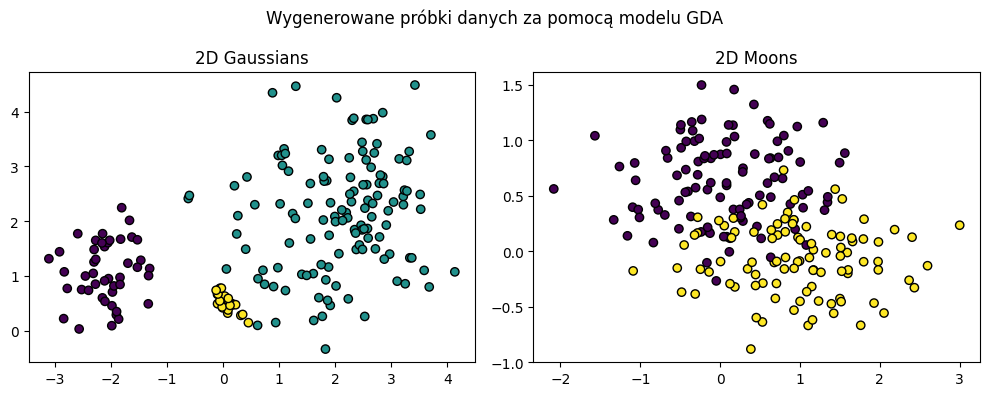

In [94]:
gen_gauss_X, gen_gauss_y = generate_data_gda(*gauss_gda, 200)
gen_moons_X, gen_moons_y = generate_data_gda(*moons_gda, 200)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
visualize_2d_dataset(gen_gauss_X, gen_gauss_y, "2D Gaussians")
plt.subplot(1, 2, 2)
visualize_2d_dataset(gen_moons_X, gen_moons_y, "2D Moons")
plt.suptitle("Wygenerowane próbki danych za pomocą modelu GDA")
plt.tight_layout()
plt.show()

Twoje wnioski:
- Dla 2D Gaussians próbkowanie działa bardzo dobrze. Dane wygenerowane przypominają zbiór treningowy
- Dla 2d Moons dane wyglądają zupełnie inaczej z racji, że próbki w ramach klas nie pochodzą z rozkładu normalnego.

Tutaj też już są wnioski :/

## Detekcja próbek spoza rozkładu danych uczących
Korzystając z marginalizacji, jesteśmy w stanie także modelować rozkład $p(x)$, zgodnie z wzorem
$$ p(x) = \sum_{k=1}^K p(x | y=k) p(y=k) = \sum_{k=1}^K \mathcal{N}(\mu_k, \Sigma_k) \pi_k \tag{10} $$

Taki rozkład nie posiada informacji o klasie $y$, natomiast może być bardzo użyteczny w:
- generowaniu danych niezaetykietowanych,
- wyznaczaniu wiarygodności, czy testowa próbka danych $x^{(new)}$ pochodzi z rozkładu danych na którch model był wytrenowany.

Nas będzie interesować drugie zastosowanie. Będziemy wyznaczać $p(x)$ i gdy będzie on niższy od zadanego progu $\epsilon$, będziemy traktować takie próbki jako *out-of-distribution* (OOD). 


Rozpisując równianie (10) otrzymujemy
$$
\begin{align*}
p(x) &= \sum_{i = k}^K p(x | y = k) p(y = k) = \sum_{k=1}^K \mathcal{N}(\mu_k, \Sigma_k) \pi_k = \\
& = \sum_{k=1}^K (2 \cdot 3.14)^{-\frac{d}{2}} det(\Sigma_k)^{-\frac{1}{2}} \exp(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)) \pi_k = \\
& = \frac{1}{2 \cdot 3.14} \sum_{k=1}^K  det(\Sigma_k)^{-\frac{1}{2}} \exp(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)) \pi_k. \tag{11}\\
\end{align*}
$$

## Zadanie 5 (0.6 pkt)
Zaimplementuj funkcję `detect_ood`, w której na podstawie wytrenowanego modelu GDA wyznaczymy $p(x)$ na podstawie (11) i gdy wartość tego rozkładu będzie mniejsza niż $\epsilon$ funkcja zwróci 1 (próbka OOD), w przeciwnym wypadku 0 (próbka z rozkładu treningowego).


In [95]:
def detect_ood(pi, mu, sigma, X, epsilon=0.001):
    is_ood = None

    # POCZĄTEK ROZWIĄZANIA
    K = len(pi)
    N = len(X)
    is_ood = np.zeros(N)
    for i in range(N):
        p = np.zeros(K)
        for k in range(K):
            p[k] = 1/(2*np.pi)*np.sum(np.linalg.det(sigma[k])**(-0.5)*np.exp(-0.5*(X[i] - mu[k]).T @ np.linalg.inv(sigma[k]) @ (X[i] - mu[k]))*pi[k])
        is_ood[i] = np.sum(p) < epsilon
    # KONIEC ROZWIĄZANIA
    return is_ood

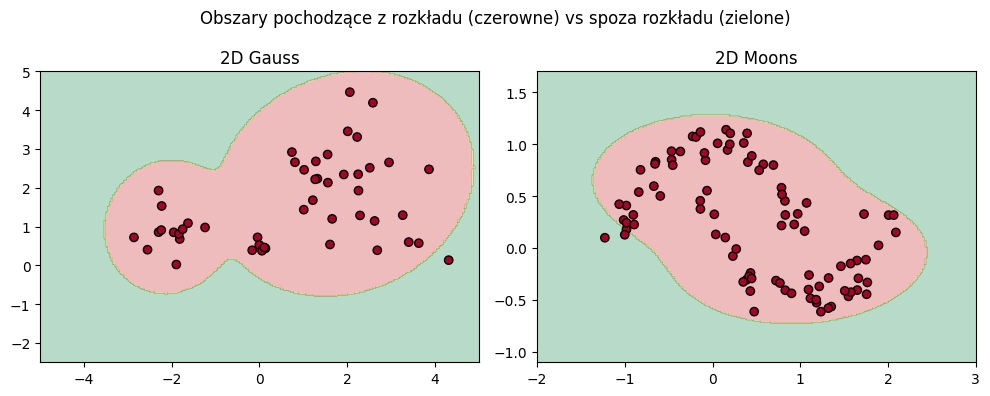

In [96]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
visualize_model(lambda *args: detect_ood(*args, epsilon=0.001), *gauss_gda, X_gauss_test, [0]*len(X_gauss_test), title="2D Gauss", x_lims=[-5, 5], y_lims=[-2.5, 5], frequency=250, cmap='RdYlGn')
plt.subplot(1, 2, 2)
visualize_model(lambda *args: detect_ood(*args, epsilon=0.05), *moons_gda, X_moons_test, [0]*len(X_moons_test), title="2D Moons", x_lims=[-2, 3], y_lims=[-1.1, 1.7], frequency=250, cmap='RdYlGn')
plt.suptitle("Obszary pochodzące z rozkładu (czerowne) vs spoza rozkładu (zielone)")
plt.tight_layout()
plt.show()